<font color=red><h2>Scenario:</h2></font>
A car whose mass is m (kg) is running on Whitehorse Road with the velocity v (m/s) (v>0). Suddenly, there is another car stopping in front of the car. The distance between two cars is d meter(s). Based on fuzzy-based expert systems, auto-brakning system should be implemented in the car. It automically generates a appropriate branking force F (N) to stop the car and avoid car accident.
<br><br>
<font color=blue>Assume that:


</font>
<ul>
    <li>The highest speed limit the car can gain is v = 100 km/h</li>
    <li>The maximum distance between two cars ideally is d = 10 m</li>
    <li>The highest percentage of braking power is 100% (0%: the lightest and 100%: the heaviest)</li>
</ul>


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
# Create the universe variables
speed = np.arange(0,101,1)
distance = np.arange(0,11,1)
braking_force = np.arange(0, 101, 1)

# Custom membership functions for Speed
speed_distance = 100/(4-1)
speed_vslow = fuzz.trimf(speed, [0,0,speed_distance])
speed_slow = fuzz.trimf(speed, [0,speed_distance,speed_distance*2])
speed_fast = fuzz.trimf(speed, [speed_distance,speed_distance*2,speed_distance*3])
speed_vfast = fuzz.trimf(speed, [speed_distance*2,speed_distance*3,speed_distance*3])

# Custom membership functions for Distance
single_distance = 10/(4-1)
distance_vclose = fuzz.trimf(distance, [0,0,single_distance])
distance_close = fuzz.trimf(distance, [0,single_distance,single_distance*2])
distance_far = fuzz.trimf(distance, [single_distance,single_distance*2,single_distance*3])
distance_vfar = fuzz.trimf(distance, [single_distance*2,single_distance*3,single_distance*3])

# Custom membership functions for Braking Force
# (braking-force)/(4-1)
braking_force_distance = 100/(4-1)
braking_force_vlight = fuzz.trimf(braking_force, [0,0,braking_force_distance])
braking_force_light = fuzz.trimf(braking_force, [0,braking_force_distance,braking_force_distance*2])
braking_force_heavy = fuzz.trimf(braking_force, [braking_force_distance,braking_force_distance*2,braking_force_distance*3])
braking_force_vheavy = fuzz.trimf(braking_force, [braking_force_distance*2,braking_force_distance*3,braking_force_distance*3])

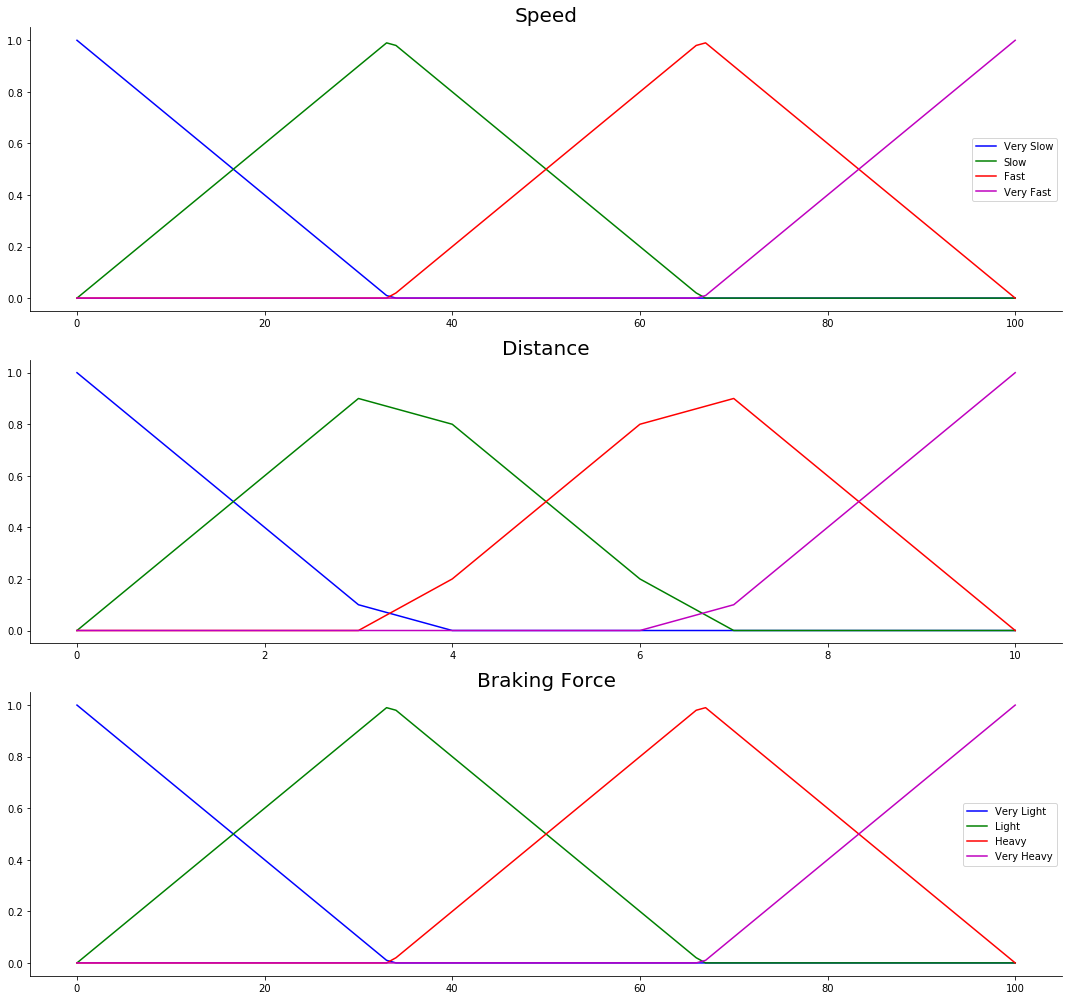

In [3]:

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 14))

ax0.plot(speed, speed_vslow, 'b', linewidth=1.5, label='Very Slow')
ax0.plot(speed, speed_slow, 'g', linewidth=1.5, label='Slow')
ax0.plot(speed, speed_fast, 'r', linewidth=1.5, label='Fast')
ax0.plot(speed, speed_vfast, 'm', linewidth=1.5, label='Very Fast')
ax0.set_title('Speed', fontsize='20')
# ax0.plot([80,80],[0,1],)
ax0.legend()

ax1.plot(distance, distance_vclose, 'b', linewidth=1.5, label='Very Close')
ax1.plot(distance, distance_close, 'g', linewidth=1.5, label='Close')
ax1.plot(distance, distance_far, 'r', linewidth=1.5, label='Far')
ax1.plot(distance, distance_vfar, 'm', linewidth=1.5, label='Very Far')
ax1.set_title('Distance', fontsize='20') 
# idx = np.argwhere(np.diff(np.sign(distance_vfar - distance_close))).flatten()
# ax1.plot(distance[idx], distance_close[idx], 'ro')
# ax1.legend()

ax2.plot(braking_force, braking_force_vlight, 'b', linewidth=1.5, label='Very Light')
ax2.plot(braking_force, braking_force_light, 'g', linewidth=1.5, label='Light')
ax2.plot(braking_force, braking_force_heavy, 'r', linewidth=1.5, label='Heavy')
ax2.plot(braking_force, braking_force_vheavy, 'm', linewidth=1.5, label='Very Heavy')
ax2.set_title('Braking Force', fontsize='20')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

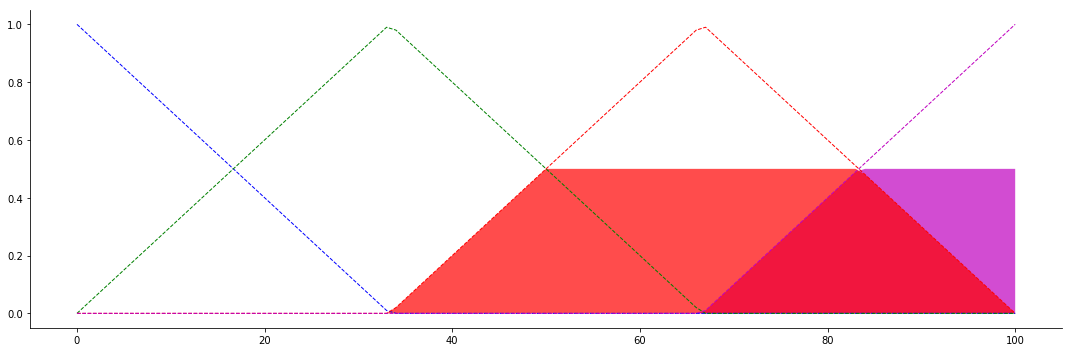

In [4]:
# Construct all rules 
# rule1 = ctrl.Rule(distance['Very close'] & speed['Very slow'], braking_force['Very light'])
# rule2 = ctrl.Rule(distance['Very close'] & speed['Slow'], braking_force['Light'])
# rule3 = ctrl.Rule(distance['Very close'] & speed['Fast'], braking_force['Heavy'])
# rule4 = ctrl.Rule(distance['Very close'] & speed['Very fast'], braking_force['Very heavy'])
# rule5 = ctrl.Rule(distance['Close'] & speed['Very slow'], braking_force['Very light'])
# rule6 = ctrl.Rule(distance['Close'] & speed['Slow'], braking_force['Light'])
# rule7 = ctrl.Rule(distance['Close'] & speed['Fast'], braking_force['Heavy'])
# rule8 = ctrl.Rule(distance['Close'] & speed['Very fast'], braking_force['Very heavy'])
# rule9 = ctrl.Rule(distance['Far'] & speed['Very slow'], braking_force['Light'])
# rule10 = ctrl.Rule(distance['Far'] & speed['Slow'], braking_force['Light'])
# rule11 = ctrl.Rule(distance['Far'] & speed['Fast'], braking_force['Heavy'])
# rule12 = ctrl.Rule(distance['Far'] & speed['Very fast'], braking_force['Heavy'])
# rule13 = ctrl.Rule(distance['Very far'] & speed['Very slow'], braking_force['Very light'])
# rule14 = ctrl.Rule(distance['Very far'] & speed['Slow'], braking_force['Very light'])
# rule15 = ctrl.Rule(distance['Very far'] & speed['Fast'], braking_force['Light'])
# rule16 = ctrl.Rule(distance['Very far'] & speed['Very fast'], braking_force['Light'])

# Activation of our fuzzy membership functions at two input values
def activation_membership_function(speed_input, distance_input):
    global speed
    global distance
    global braking_force
    
    braking_force_activation = []
    
    # Interept value input into range(0,1)
    speed_level_vSlow = fuzz.interp_membership(speed, speed_vslow, speed_input)
    speed_level_slow = fuzz.interp_membership(speed, speed_slow, speed_input)
    speed_level_fast = fuzz.interp_membership(speed, speed_fast, speed_input)
    speed_level_vFast = fuzz.interp_membership(speed, speed_vfast, speed_input)
    
    distance_level_vClose = fuzz.interp_membership(distance, distance_vclose, distance_input)
    distance_level_close = fuzz.interp_membership(distance, distance_close, distance_input)
    distance_level_far = fuzz.interp_membership(distance, distance_far, distance_input)
    distance_level_vFar = fuzz.interp_membership(distance, distance_vfar, distance_input)
    
    # Take our rules and apply them.
    # For rule 1 we connect very close distance and very slow speed with very light braking force
    active_rule1 = np.fmin(distance_level_vClose, speed_level_vSlow)
    bf_activation_vLight1 = np.fmin(active_rule1, braking_force_vlight)
    braking_force_activation.append(bf_activation_vLight1)
    
    # For rule 2 we connect very close distance and slow speed with light braking force
    active_rule2 = np.fmin(distance_level_vClose, speed_level_slow)
    bf_activation_light2 = np.fmin(active_rule2, braking_force_light)
    braking_force_activation.append(bf_activation_light2)
    
    # For rule 3 we connect very close distance and fast speed with heavy braking force
    active_rule3 = np.fmin(distance_level_vClose, speed_level_fast)
    bf_activation_heavy3 = np.fmin(active_rule3, braking_force_heavy)
    braking_force_activation.append(bf_activation_heavy3)
    
    # For rule 4 we connect very close distance and very fast speed with very heavy braking force
    active_rule4 = np.fmin(distance_level_vClose, speed_level_vFast)
    bf_activation_vHeavy4 = np.fmin(active_rule4, braking_force_vheavy)
    braking_force_activation.append(bf_activation_vHeavy4)
    
    # For rule 5 we connect close distance and very slow speed with very light braking force
    active_rule5 = np.fmin(distance_level_close, speed_level_vSlow)
    bf_activation_vLight5 = np.fmin(active_rule5, braking_force_vlight)
    braking_force_activation.append(bf_activation_vLight5)
    
    # For rule 6 we connect close distance and slow speed with light braking force
    active_rule6 = np.fmin(distance_level_close, speed_level_slow)
    bf_activation_light6 = np.fmin(active_rule6, braking_force_light)
    braking_force_activation.append(bf_activation_light6)
    
    # For rule 7 we connect close distance and fast speed with heavy braking force
    active_rule7 = np.fmin(distance_level_close, speed_level_fast)
    bf_activation_heavy7 = np.fmin(active_rule7, braking_force_heavy)
    braking_force_activation.append(bf_activation_heavy7)
    
    # For rule 8 we connect close distance and very fast speed with very heavy braking force
    active_rule8 = np.fmin(distance_level_close, speed_level_vFast)
    bf_activation_vHeavy8 = np.fmin(active_rule8, braking_force_vheavy)
    braking_force_activation.append(bf_activation_vHeavy8)
    
    # For rule 9 we connect far distance and very slow speed with light braking force
    active_rule9 = np.fmin(distance_level_far, speed_level_vSlow)
    bf_activation_light9 = np.fmin(active_rule9, braking_force_light)
    braking_force_activation.append(bf_activation_light9)
    
    # For rule 10 we connect far distance and slow speed with light braking force
    active_rule10 = np.fmin(distance_level_far, speed_level_slow)
    bf_activation_light10 = np.fmin(active_rule10, braking_force_light)
    braking_force_activation.append(bf_activation_light10)
    
    # For rule 11 we connect far distance and fast speed with heavy braking force
    active_rule11 = np.fmin(distance_level_far, speed_level_fast)
    bf_activation_heavy11 = np.fmin(active_rule11, braking_force_heavy)
    braking_force_activation.append(bf_activation_heavy11)
    
    # For rule 12 we connect far distance and very fast speed with heavy braking force
    active_rule12 = np.fmin(distance_level_far, speed_level_vFast)
    bf_activation_heavy12 = np.fmin(active_rule12, braking_force_heavy)
    braking_force_activation.append(bf_activation_heavy12)
    
    # For rule 13 we connect very far distance and very slow speed with very light braking force
    active_rule13 = np.fmin(distance_level_vFar, speed_level_vSlow)
    bf_activation_vLight13 = np.fmin(active_rule13, braking_force_vlight)
    braking_force_activation.append(bf_activation_vLight13)
    
    # For rule 14 we connect very far distance and slow speed with very light braking force
    active_rule14 = np.fmin(distance_level_vFar, speed_level_slow)
    bf_activation_vLight14 = np.fmin(active_rule14, braking_force_vlight)
    braking_force_activation.append(bf_activation_vLight14)
    
    # For rule 15 we connect very far distance and fast speed with light braking force
    active_rule15 = np.fmin(distance_level_vFar, speed_level_fast)
    bf_activation_light15 = np.fmin(active_rule15, braking_force_light)
    braking_force_activation.append(bf_activation_light15)
    
    # For rule 16 we connect very far distance and very fast speed with light braking force
    active_rule16 = np.fmin(distance_level_vFar, speed_level_vFast)
    bf_activation_light16 = np.fmin(active_rule16, braking_force_light)
    braking_force_activation.append(bf_activation_light16)
    
    return braking_force_activation

# Visualize output membership activity
braking_force0 = np.zeros_like(braking_force)
output_membership_activity = activation_membership_function(100,5)

fig, ax0 = plt.subplots(figsize=(15, 5))

colors = ['b','g','r','m','b','g','r','m','b','b','r','r','g','g','b','b']

for num in range(len(colors)):
    ax0.fill_between(braking_force, braking_force0, output_membership_activity[num], facecolor=colors[num], alpha=0.7)
    
ax0.plot(braking_force, braking_force_vlight, 'b', linewidth=1, linestyle='--', )
ax0.plot(braking_force, braking_force_light, 'g', linewidth=1, linestyle='--', )
ax0.plot(braking_force, braking_force_heavy, 'r', linewidth=1, linestyle='--', )
ax0.plot(braking_force, braking_force_vheavy, 'm', linewidth=1, linestyle='--', )

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [7]:
# Aggregate all three output membership functions together
from functools import reduce
def max_array(arr1,arr2):
    return np.fmax(arr1, arr2)
aggregated = reduce(max_array,output_membership_activity)



70.63067078048223


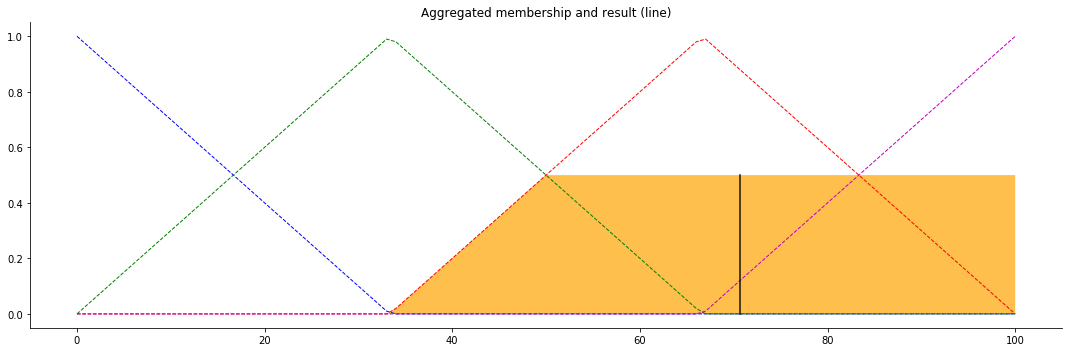

In [10]:
#############
# CENTROID #
############

# Calculate defuzzified result
braking = fuzz.defuzz(braking_force, aggregated, 'centroid')
print(braking)
braking_activation = fuzz.interp_membership(braking_force, aggregated, braking)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(15, 5))

ax0.plot(braking_force, braking_force_vlight, 'b', linewidth=1, linestyle='--', )
ax0.plot(braking_force, braking_force_light, 'g', linewidth=1, linestyle='--')
ax0.plot(braking_force, braking_force_heavy, 'r', linewidth=1, linestyle='--')
ax0.plot(braking_force, braking_force_vheavy, 'm', linewidth=1, linestyle='--')

ax0.fill_between(braking_force, braking_force0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([braking, braking], [0, braking_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
    

70.83


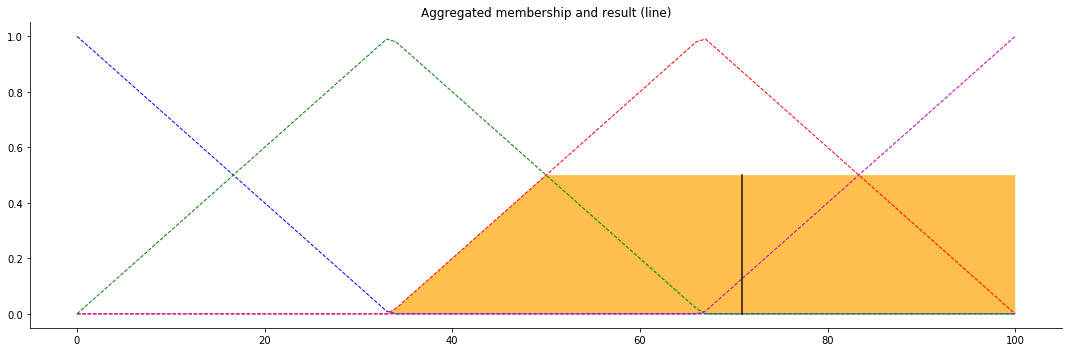

In [11]:
#############
# BISECTOR #
############

# Calculate defuzzified result
braking = fuzz.defuzz(braking_force, aggregated, 'bisector')
print(braking)
braking_activation = fuzz.interp_membership(braking_force, aggregated, braking)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(15, 5))

ax0.plot(braking_force, braking_force_vlight, 'b', linewidth=1, linestyle='--', )
ax0.plot(braking_force, braking_force_light, 'g', linewidth=1, linestyle='--')
ax0.plot(braking_force, braking_force_heavy, 'r', linewidth=1, linestyle='--')
ax0.plot(braking_force, braking_force_vheavy, 'm', linewidth=1, linestyle='--')

ax0.fill_between(braking_force, braking_force0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([braking, braking], [0, braking_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
    

92.0


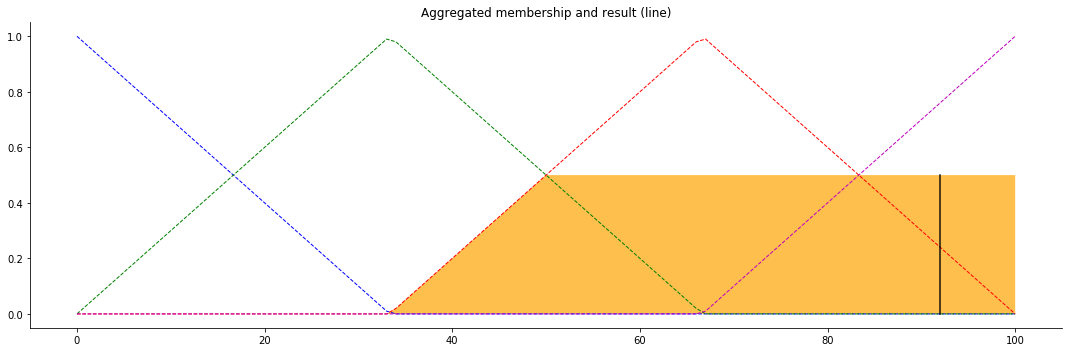

In [14]:
####################
# MEAN OF MAXIMUM #
##################

# Calculate defuzzified result
braking = fuzz.defuzz(braking_force, aggregated, 'mom')
print(braking)
braking_activation = fuzz.interp_membership(braking_force, aggregated, braking)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(15, 5))

ax0.plot(braking_force, braking_force_vlight, 'b', linewidth=1, linestyle='--', )
ax0.plot(braking_force, braking_force_light, 'g', linewidth=1, linestyle='--')
ax0.plot(braking_force, braking_force_heavy, 'r', linewidth=1, linestyle='--')
ax0.plot(braking_force, braking_force_vheavy, 'm', linewidth=1, linestyle='--')

ax0.fill_between(braking_force, braking_force0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([braking, braking], [0, braking_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
    

84


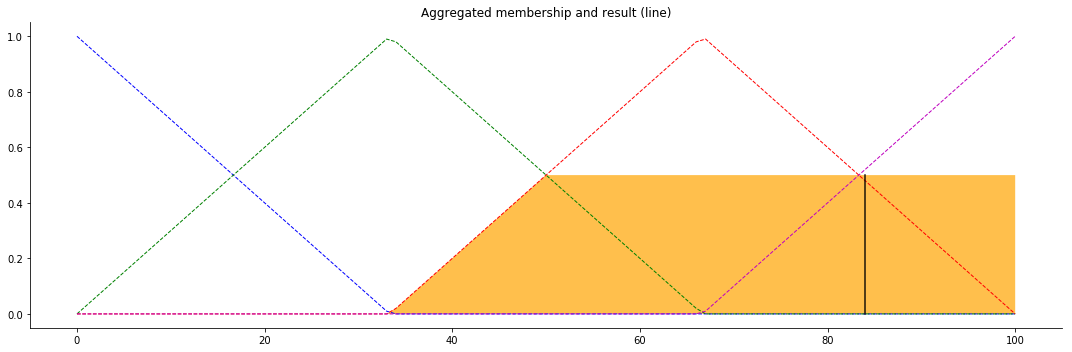

In [15]:
###################
# MIN OF MAXIMUM #
#################

# Calculate defuzzified result
braking = fuzz.defuzz(braking_force, aggregated, 'som')
print(braking)
braking_activation = fuzz.interp_membership(braking_force, aggregated, braking)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(15, 5))

ax0.plot(braking_force, braking_force_vlight, 'b', linewidth=1, linestyle='--', )
ax0.plot(braking_force, braking_force_light, 'g', linewidth=1, linestyle='--')
ax0.plot(braking_force, braking_force_heavy, 'r', linewidth=1, linestyle='--')
ax0.plot(braking_force, braking_force_vheavy, 'm', linewidth=1, linestyle='--')

ax0.fill_between(braking_force, braking_force0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([braking, braking], [0, braking_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
    

100


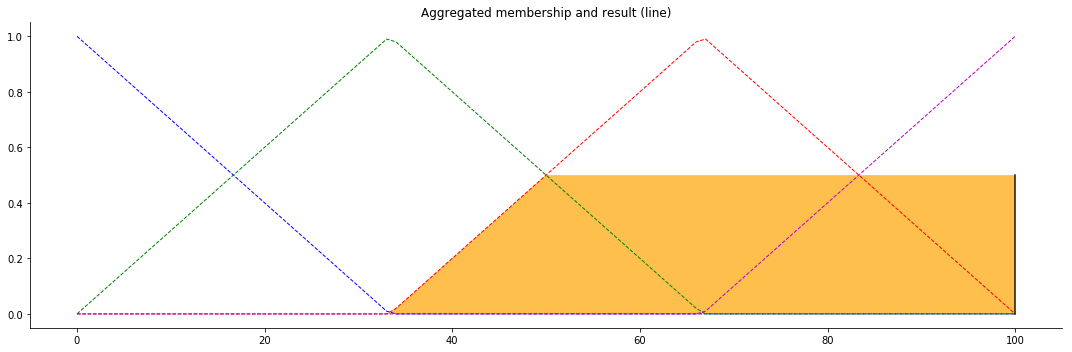

In [16]:
###################
# MAX OF MAXIMUM #
#################

# Calculate defuzzified result
braking = fuzz.defuzz(braking_force, aggregated, 'lom')
print(braking)
braking_activation = fuzz.interp_membership(braking_force, aggregated, braking)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(15, 5))

ax0.plot(braking_force, braking_force_vlight, 'b', linewidth=1, linestyle='--', )
ax0.plot(braking_force, braking_force_light, 'g', linewidth=1, linestyle='--')
ax0.plot(braking_force, braking_force_heavy, 'r', linewidth=1, linestyle='--')
ax0.plot(braking_force, braking_force_vheavy, 'm', linewidth=1, linestyle='--')

ax0.fill_between(braking_force, braking_force0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([braking, braking], [0, braking_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
    